In [2]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
class Generator(nn.Module):
    '''
    Generator class. Accepts a tensor of size 100 as input as outputs another
    tensor of size 784. Objective is to generate an output tensor that is
    indistinguishable from the real MNIST digits 
    '''

    def __init__(self):
        super().__init__()
        self.layer1 = nn.Sequential(nn.Linear(in_features=128, out_features=256),
                                    nn.LeakyReLU())
        self.layer2 = nn.Sequential(nn.Linear(in_features=256, out_features=512),
                                    nn.LeakyReLU())
        self.layer3 = nn.Sequential(nn.Linear(in_features=512, out_features=1024),
                                    nn.LeakyReLU())
        self.output = nn.Sequential(nn.Linear(in_features=1024, out_features=28*28),
                                    nn.Tanh())

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.output(x)
        return x

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [3]:
G = Generator().to(device)

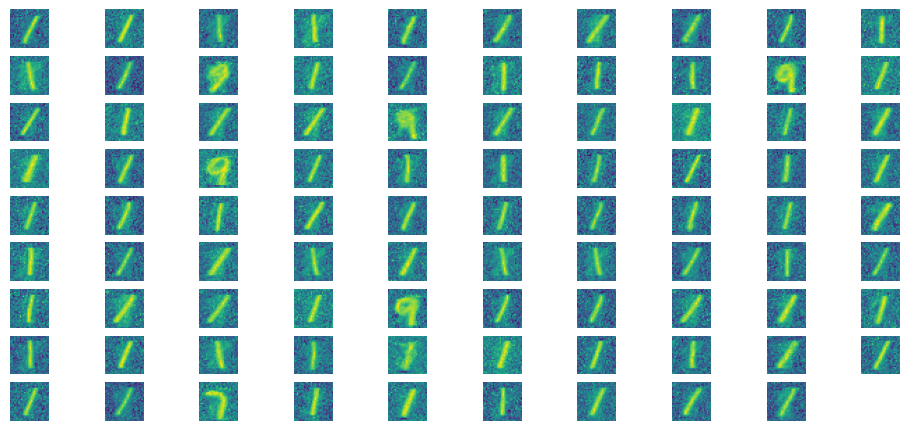

In [4]:
import time
plt.figure(figsize=(12,12))
for i in range(1,90):
    model = torch.load('Generator_epoch_819.pth')
    img = np.reshape(model(torch.randn(1,128).to(device)).cpu().detach().numpy(),(28,28))
    plt.subplot(20,10,i)
    plt.axis('off')
    plt.imshow(img)